<a href="https://colab.research.google.com/github/nureeee/Machhine-Learning/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%84%98%ED%8C%8C%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [3]:
import numpy as np
import pandas as pd

# 데이터 불러오기

In [4]:
# csv파일 판다스로 불러오기
df = pd.read_csv('/content/drive/MyDrive/bike_train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
df.values

array([['2011-01-01 00:00:00', 1, 0, ..., 3, 13, 16],
       ['2011-01-01 01:00:00', 1, 0, ..., 8, 32, 40],
       ['2011-01-01 02:00:00', 1, 0, ..., 5, 27, 32],
       ...,
       ['2012-12-19 21:00:00', 4, 0, ..., 4, 164, 168],
       ['2012-12-19 22:00:00', 4, 0, ..., 12, 117, 129],
       ['2012-12-19 23:00:00', 4, 0, ..., 4, 84, 88]], dtype=object)

# 판다스 데이터 프레임을 넘파이로 바꾸기
 판다스로 불러온 DF데이터세트를 np_df의 넘파이로 불러옴

In [6]:
np_df = np.array(df)
np_df

array([['2011-01-01 00:00:00', 1, 0, ..., 3, 13, 16],
       ['2011-01-01 01:00:00', 1, 0, ..., 8, 32, 40],
       ['2011-01-01 02:00:00', 1, 0, ..., 5, 27, 32],
       ...,
       ['2012-12-19 21:00:00', 4, 0, ..., 4, 164, 168],
       ['2012-12-19 22:00:00', 4, 0, ..., 12, 117, 129],
       ['2012-12-19 23:00:00', 4, 0, ..., 4, 84, 88]], dtype=object)

# 텍스트 시계열 데이터를 날짜데이터로 변환하기

In [7]:
# 파이썬 내장한수 사용
from datetime import date
import datetime

In [8]:
# 원본 데이터에서 object로 되어있는 시계열 텍스트 데이터 저장
date_time_obj = np_df[:,0]
date_time_obj

array(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
       '2011-01-01 02:00:00', ..., '2012-12-19 21:00:00',
       '2012-12-19 22:00:00', '2012-12-19 23:00:00'], dtype=object)

In [9]:
# 날짜 텍스트를 날짜 데이터로 변환
date_list = []
for i in date_time_obj:
    a = datetime.datetime.fromisoformat(i)
    date_list.append(a)

In [10]:
# 데이터가 잘 변환되었는지 확인하기
date_list[0].hour

0

In [11]:
# 데이터 복사하기
df_copy = np_df.copy()
np_df.shape

(10886, 12)

In [12]:
# 날짜 텍스트 데이터를 삭제  
df_copy = np.delete(df_copy, 0, axis=1)
df_copy

array([[1, 0, 0, ..., 3, 13, 16],
       [1, 0, 0, ..., 8, 32, 40],
       [1, 0, 0, ..., 5, 27, 32],
       ...,
       [4, 0, 1, ..., 4, 164, 168],
       [4, 0, 1, ..., 12, 117, 129],
       [4, 0, 1, ..., 4, 84, 88]], dtype=object)

In [13]:
df_copy.shape
# 해당 데이터가 삭제된 것을 볼 수 있다.

(10886, 11)

In [14]:
# 리스트를 넘파이로 변환
date_list = np.array(date_list)
date_list.shape

(10886,)

In [15]:
# 2차 배열로 변환
date_list = date_list.reshape(-1, 1)
date_list.shape

(10886, 1)

In [16]:
# 두개의 배열 합치기
data1 = np.hstack((date_list, df_copy))
data1

array([[datetime.datetime(2011, 1, 1, 0, 0), 1, 0, ..., 3, 13, 16],
       [datetime.datetime(2011, 1, 1, 1, 0), 1, 0, ..., 8, 32, 40],
       [datetime.datetime(2011, 1, 1, 2, 0), 1, 0, ..., 5, 27, 32],
       ...,
       [datetime.datetime(2012, 12, 19, 21, 0), 4, 0, ..., 4, 164, 168],
       [datetime.datetime(2012, 12, 19, 22, 0), 4, 0, ..., 12, 117, 129],
       [datetime.datetime(2012, 12, 19, 23, 0), 4, 0, ..., 4, 84, 88]],
      dtype=object)

넘파이로는 seaborn으로 시각화를 할 수 없다...

In [17]:
# years = []

# for date in data:
#     years.append(date[0].year)

# s = pd.DataFrame(pd.Series(years, name="v"))
# sns.countplot(data=s, x='v')



# figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
# figure.set_size_inches(18,8)

# sns.barplot(data=data, x=data.year, y='count', ax=ax1)
# sns.barplot(data=data, x=data.month, y='count', ax=ax2)
# sns.barplot(data=data, x=[datetime.datetime].day, y='count', ax=ax3)
# sns.barplot(data=data, x=[datetime.datetime].hour, y='count', ax=ax4)

# ax1.set(ylabel='count', title='연도별 대여량')
# ax2.set(xlabel='month', title='월별 대여량')
# ax3.set(xlabel='day', title='일별 대여량')
# ax4.set(xlabel='hour', title='시간별 대여량')

# datetime을 years, months, days, hours, dayofweeks로 뽑아낸다.

In [18]:
# datetime을 years, months, days, hours, dayofweeks로 추출하여 새로운 numpy 제작
years = []
months = []
days = []
hours = []
dayofweeks=[]
TIMESTAMP_IDX = 0
for data in data1:
  years.append(data[TIMESTAMP_IDX].year)
  months.append(data[TIMESTAMP_IDX].month)
  days.append(data[TIMESTAMP_IDX].day)
  hours.append(data[TIMESTAMP_IDX].hour)
  dayofweeks.append(data[TIMESTAMP_IDX].weekday())
date_ndarray = np.array([
  years, months, days, hours, dayofweeks
])
# list로 먼저 만들고 numpy로 묶음
date_ndarray

array([[2011, 2011, 2011, ..., 2012, 2012, 2012],
       [   1,    1,    1, ...,   12,   12,   12],
       [   1,    1,    1, ...,   19,   19,   19],
       [   0,    1,    2, ...,   21,   22,   23],
       [   5,    5,    5, ...,    2,    2,    2]])

In [19]:
# 추출해온 데이터 shape 확인
date_ndarray.shape

(5, 10886)

In [20]:
# 추출해온 데이터를 transposition
data_np = date_ndarray.T
data_np.shape

(10886, 5)

In [21]:
data = np.hstack((data_np, df_copy))
data

array([[2011, 1, 1, ..., 3, 13, 16],
       [2011, 1, 1, ..., 8, 32, 40],
       [2011, 1, 1, ..., 5, 27, 32],
       ...,
       [2012, 12, 19, ..., 4, 164, 168],
       [2012, 12, 19, ..., 12, 117, 129],
       [2012, 12, 19, ..., 4, 84, 88]], dtype=object)

# 가설 세우기
* 날이 더운 여름이나 추운 겨울에는 비회원보다 회원의 수가 더 많을 것이다  
> 회원으로 등록하고 자전거를 탄다는 것은 앞으로도 자전거를 탈 계획이 있는 사람이 그렇지 않은 사람보다 날씨의 영향을 덜 받을 것이다.
> 예를 들자면... 운동을 꾸준히 하는 사람이 있는데 날씨가 흐려도 날이 별로지만 오늘도 운동을 해야지 하고 계획에 맞춰서 나가겠지만 비회원은 날이 흐리면 다음을 기약하고 미루기 쉽다.

# 데이터 상관관계 분석

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# 에러 발생
# data_cor = np.corrcoef(data)
# data_cor

In [24]:
ate = list(data[:, 9])
tem = list(data[:, 8])
hum = list(data[:, 10])
wor = list(data[:, 6])
hol = list(data[:, 5])
cou = list(data[:, -1])
cas = list(data[:, -3])
reg = list(data[:, -2])

xarr = [ate, tem, hum, wor, hol, cou, cas, reg]
xarr = np.array(xarr)

xarr_cor = np.corrcoef(xarr) # 전체로 보는상관관계
xarr_cor

array([[ 1.00000000e+00, -5.50354182e-02,  9.84948110e-01,
         2.94603393e-04,  2.58688551e-01,  3.94453645e-01,
         4.67097064e-01,  3.18571280e-01],
       [-5.50354182e-02,  1.00000000e+00, -5.53759732e-02,
        -7.07391151e-03,  8.87865085e-03, -1.28655201e-01,
        -1.35917680e-01, -1.09340372e-01],
       [ 9.84948110e-01, -5.53759732e-02,  1.00000000e+00,
        -5.21477822e-03,  2.64744326e-01,  3.89784437e-01,
         4.62066536e-01,  3.14635386e-01],
       [ 2.94603393e-04, -7.07391151e-03, -5.21477822e-03,
         1.00000000e+00,  2.93676097e-02, -5.39298448e-03,
         4.37989287e-02, -2.09556729e-02],
       [ 2.58688551e-01,  8.87865085e-03,  2.64744326e-01,
         2.93676097e-02,  1.00000000e+00,  1.63439017e-01,
         9.67580628e-02,  1.64010534e-01],
       [ 3.94453645e-01, -1.28655201e-01,  3.89784437e-01,
        -5.39298448e-03,  1.63439017e-01,  1.00000000e+00,
         6.90413565e-01,  9.70948106e-01],
       [ 4.67097064e-01, -1.359176

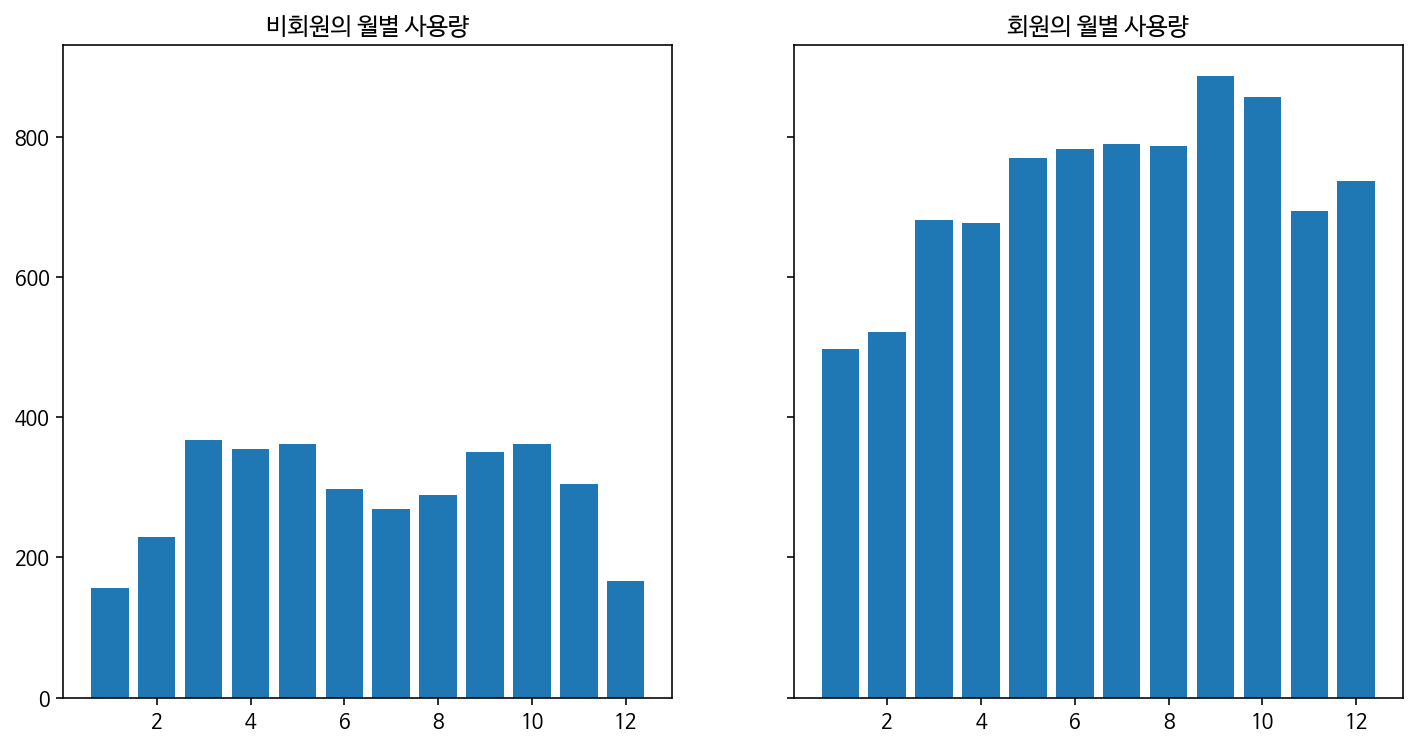

In [25]:
# 비회원, 회원의 월별 사용량
f, axes = plt.subplots(1, 2, sharex=True, sharey=True)
f.set_size_inches((12, 6))

axes[0].bar(data[:, 1], data[:, -3])
axes[0].set_title('비회원의 월별 사용량')

axes[1].bar(data[:, 1], data[:, -2])
axes[1].set_title('회원의 월별 사용량')
plt.show()

* 비회원은 자전거 타기 좋은 봄과 가을에 사용자가 많다.
* 회원은 3월부터 사용량이 증가하고 여름부터 가을까지 사용량이 가장 많다가 겨울에 다시 사용량이 줄었다.


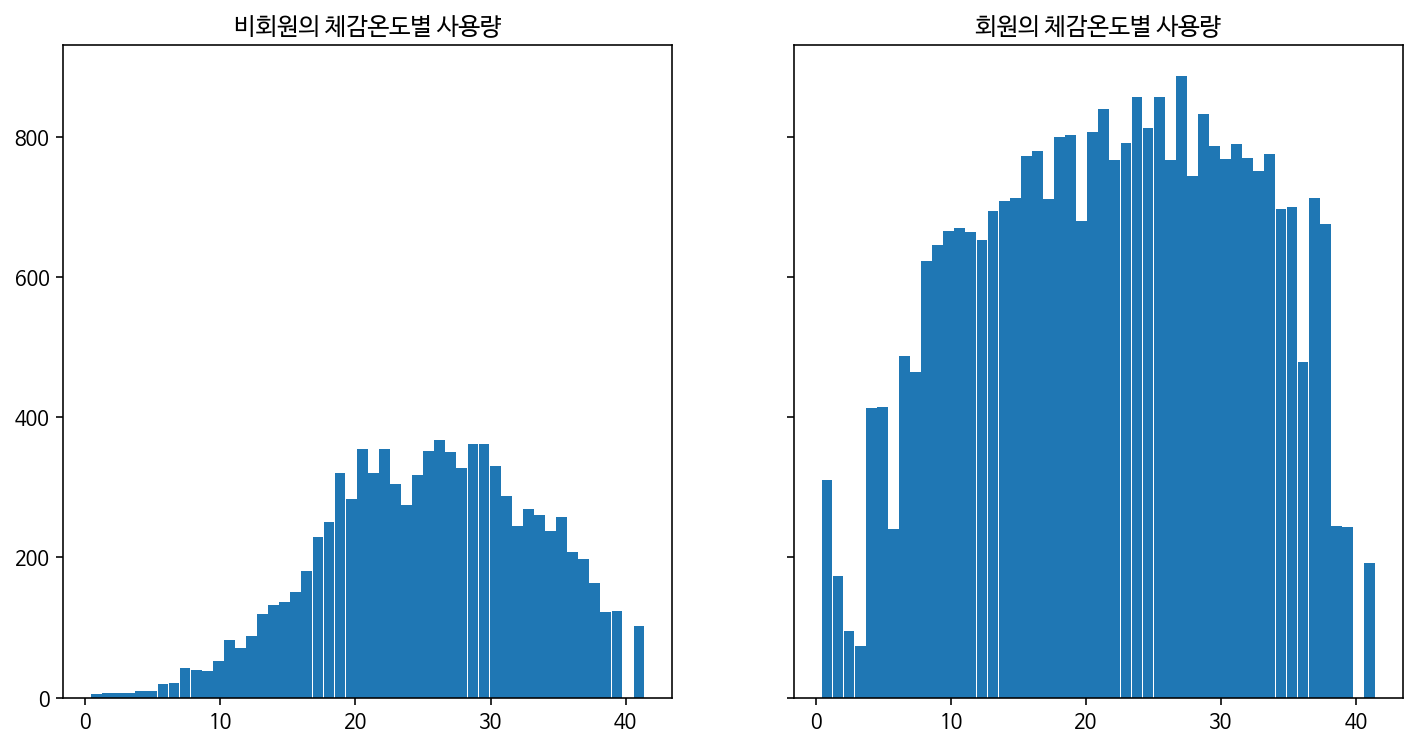

In [26]:
f, axes = plt.subplots(1, 2, sharex=True, sharey=True)
f.set_size_inches((12, 6))

axes[0].bar(data[:, 9], data[:, -3])
axes[0].set_title('비회원의 체감온도별 사용량')

axes[1].bar(data[:, 9], data[:, -2])
axes[1].set_title('회원의 체감온도별 사용량')
plt.show()

* 비회원은 체감온도 20~30도 사이에 사용량이 많고
* 회원은 체감온도 0도에 가까울 때와 40도에 가까울 때 를 제외하고 일정량 이상의 사용량이 보인다. 

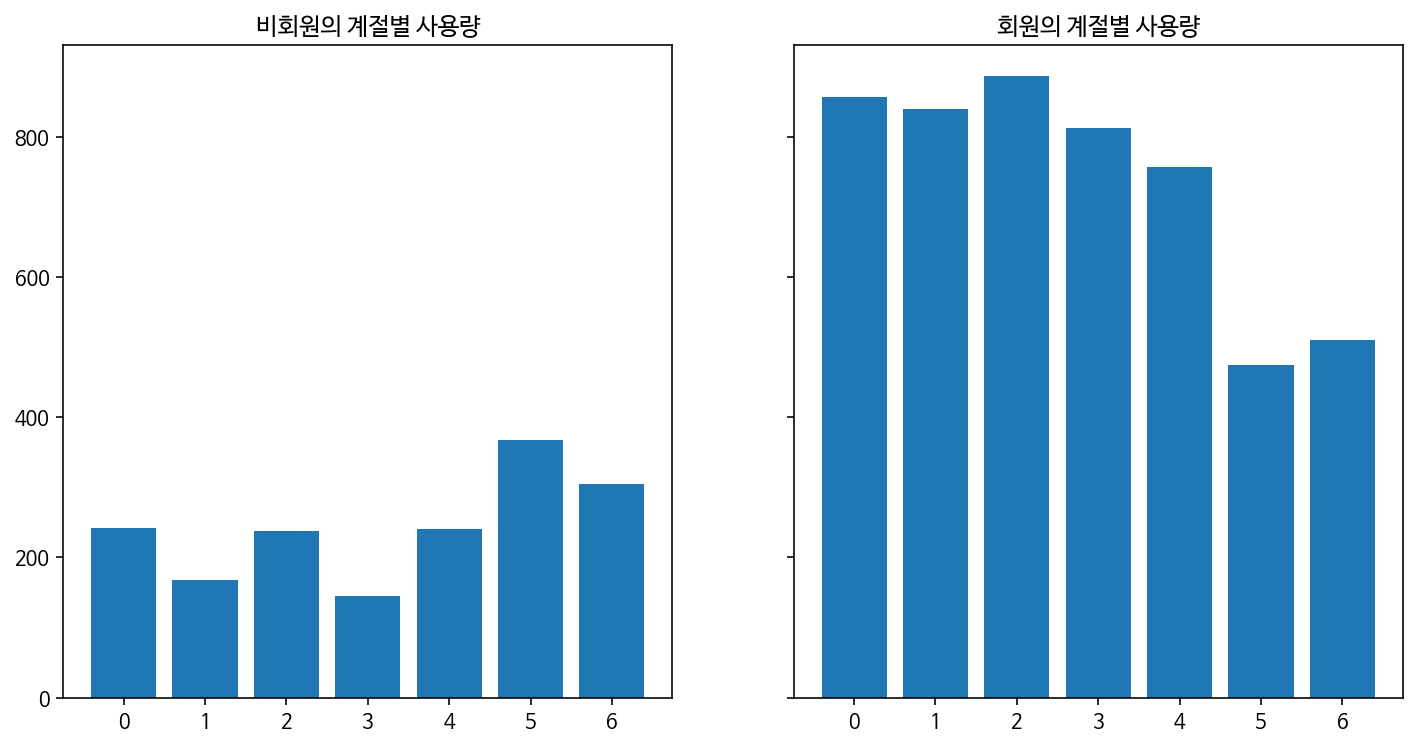

In [27]:
f, axes = plt.subplots(1, 2, sharex=True, sharey=True)
f.set_size_inches((12, 6))

axes[0].bar(data[:, 4], data[:, -3])
axes[0].set_title('비회원의 계절별 사용량')

axes[1].bar(data[:, 4], data[:, -2])
axes[1].set_title('회원의 계절별 사용량')
plt.show()

사계절이...육계절이 되었다....

# Train Set, Test Set 나누기

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    data[:, :-1], 
    data[:, -1], 
    random_state=42,
    stratify=data[:, 1]
)

# 모델 선정 및 훈련

## 선형회귀 알고리즘

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
lin_reg.predict(x_test)

array([383., 359.,  11., ..., 277., 596.,  74.])

In [31]:
lin_reg.score(x_test, y_test)

1.0

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
my_predictions = {}
colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]
def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)
    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()
def mse_eval(name_, pred, actual):
    global predictions
    global colors
    plot_predictions(name_, pred, actual)
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    length = len(df)
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    plt.show()
def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model = LinearRegression(n_jobs = -1)
model.fit(x_train, y_train)

In [36]:
pred = model.predict(x_test)

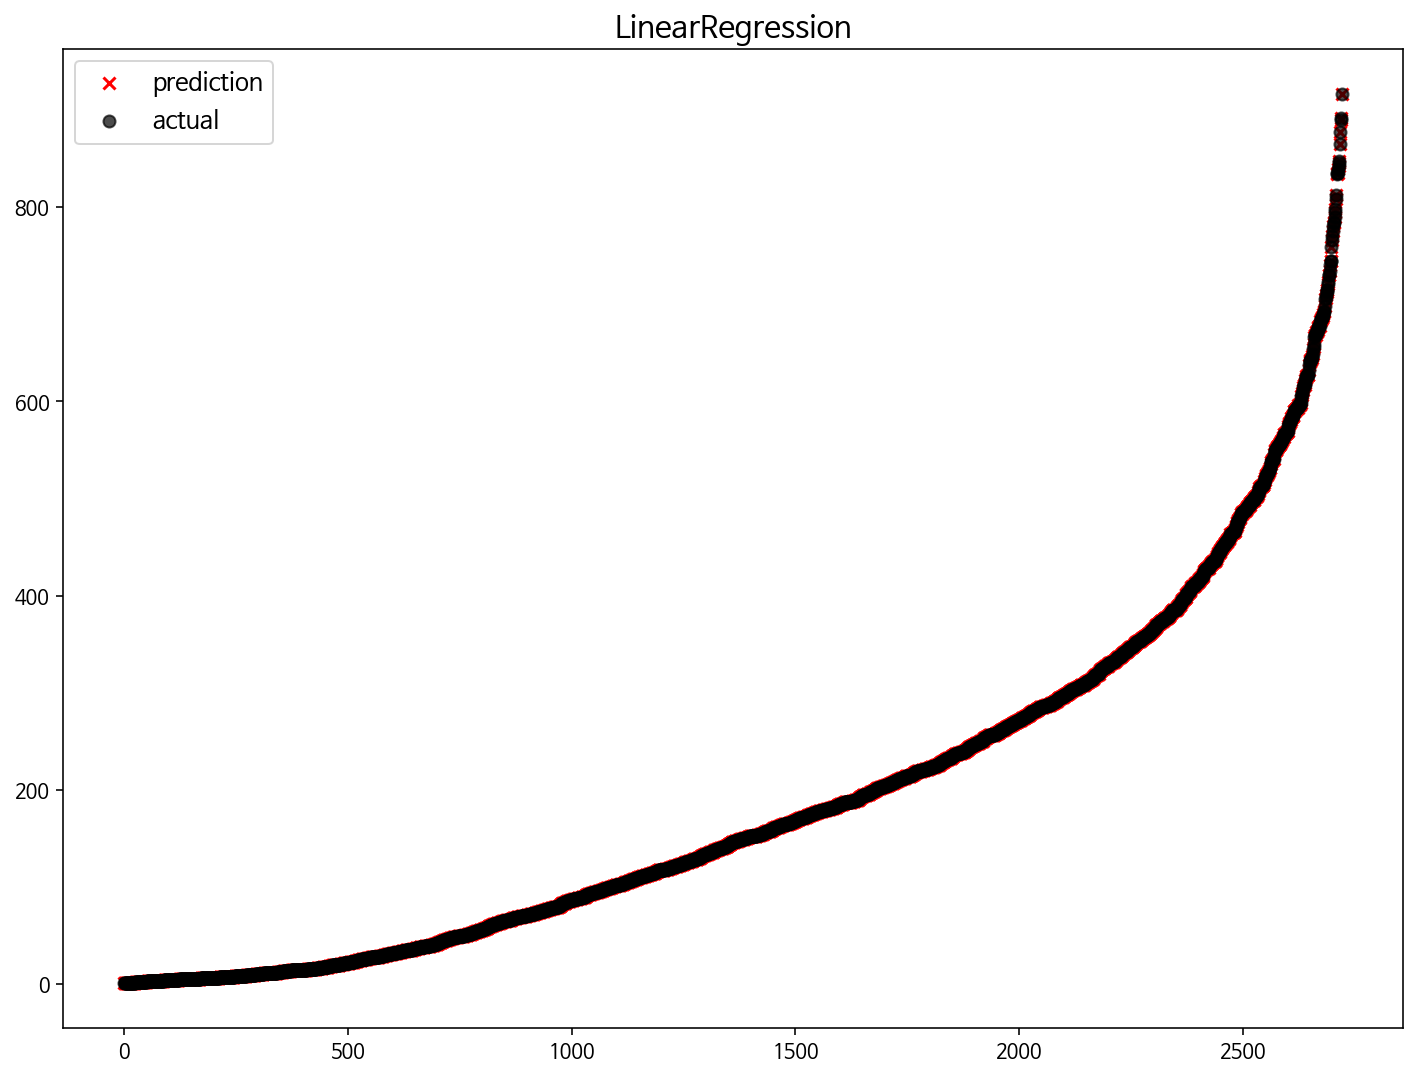

              model           mse
0  LinearRegression  1.527707e-25


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


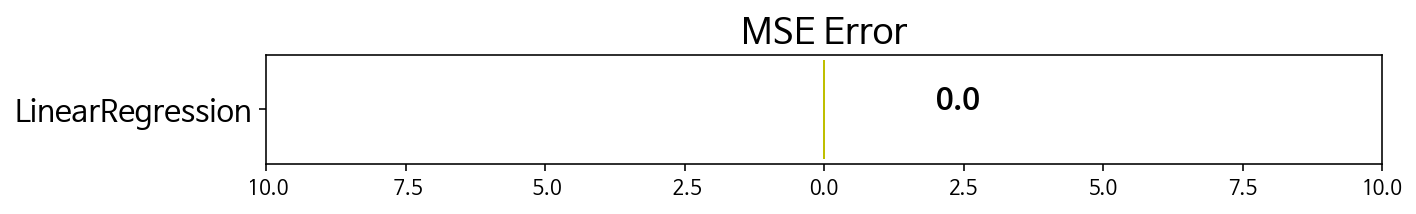

In [39]:
mse_eval('LinearRegression', pred, y_test)